<a href="https://colab.research.google.com/github/mohigot/Heart/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

e. Boxplot and Outliers

Mounted at /content/drive
[468, 518, 412, 529, 466, 603, 491, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 458, 0, 0, 0, 0, 0, 0, 564, 417, 409]


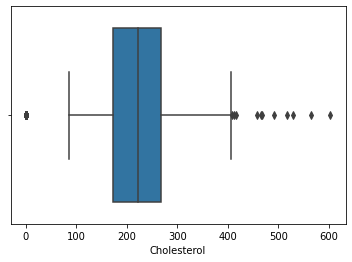

In [2]:
import pandas as pd 
import numpy as np
import scipy.stats
from google.colab import drive 
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.neighbors import DistanceMetric
import plotly 
import plotly.express as px
from scipy.stats import chi2_contingency


drive.mount('/content/drive')

path = "/content/drive/MyDrive/heart.csv"
data = pd.read_csv(path)


def detect_outlier(dt):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(dt), [25, 75])

    # compute IRQ
    iqr = q3 - q1

    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers = [x for x in dt if x <= lower_bound or x >= upper_bound]

    return outliers

ax = sns.boxplot(x=data['Cholesterol'])
print(detect_outlier(data['Cholesterol']))

b. Distribution

In [ ]:
numerics = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numerics:
  sns.histplot(data[col] , color="lightblue", kde=True, linewidth=0)
  plt.show()  

c. accuracy, validity, completeness

In [ ]:
import missingno as msno
msno.matrix(data) #checking completeness

In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

d. Histogram

*Numeric Data*

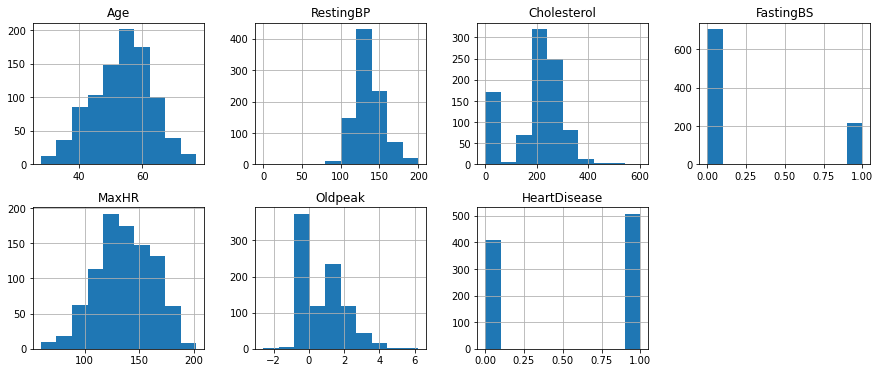

In [3]:
data.hist(figsize=(15, 6), layout=(2, 4));

*Categorical Data*


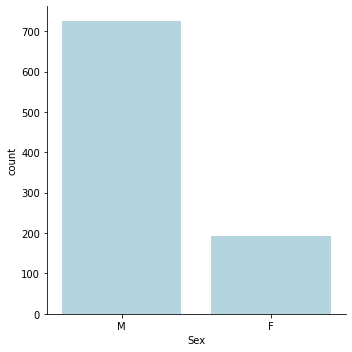

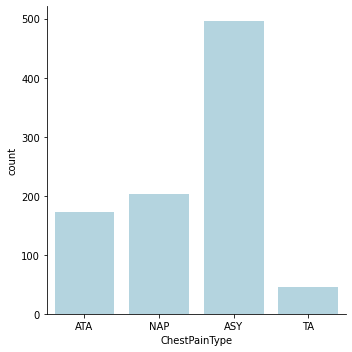

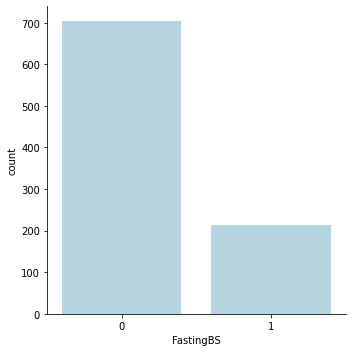

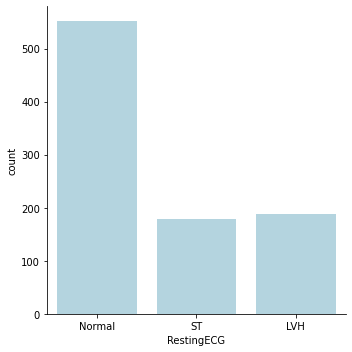

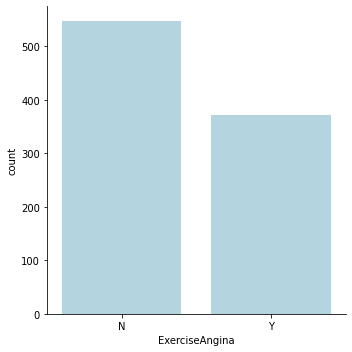

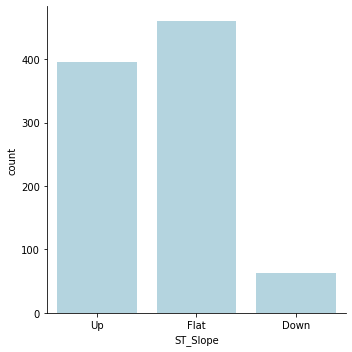

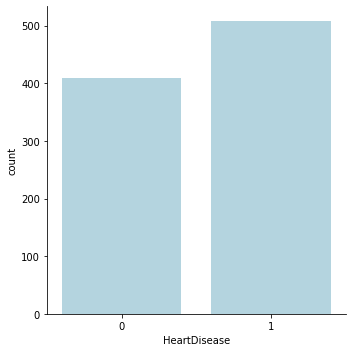

In [ ]:
categoricals = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']


for item in categoricals:
  sns.catplot(x=item, kind="count", color="lightblue", data=data)


a. Data info

In [ ]:
print(data.dtypes)
data.describe().T

In [ ]:
print("mode:","\n",data.mode(dropna=False),"\n")

In [ ]:
print("median:","\n",data.median(numeric_only=True),"\n")

f. Dissimilarity Matrix


In [ ]:
!pip install gower

import gower

#choose n random rows of dataset 
sample = data.sample(n=6)

print(sample)

categoricals = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

def dissimilarity(smpl):
  temp = [[] for i in range(len(sample))] 
  smplList = sample[smpl].tolist()
  for i in range(len(smplList)):
    for j in range(len(smplList)):
      if smpl in categoricals:
        temp[i].append(0) if smplList[i] == smplList[j] else temp[i].append(1)
      else:
        diff =  max(smplList) - min(smplList)
        temp[i].append(abs(smplList[i] - smplList[j]) / diff)
  return temp  

for col in data.columns:
  print(np.matrix(dissimilarity(col)), '\n {} \n'.format(col))

print(gower.gower_matrix(np.asarray(sample)), '\n Dissimilarity Matrix')


g.correlation

In [ ]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

h.Scatter plot

In [ ]:
categorical_item = ['Sex','ChestPainType', 'FastingBS','RestingECG', 'ExerciseAngina','ST_Slope', 'HeartDisease']
numeric_items = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for i in range(len(numeric_items)) :
  for j in range(len(categorical_item)) :
    if(j >= (i+1) and j<len(numeric_items)):
        title="Scatter plot of attributes "+numeric_items[i] +" and "+numeric_items[j]
        sns.regplot(x=numeric_items[i], y=numeric_items[j], data=data, line_kws={"color": "purple"})
        plt.title(title)
        plt.show()
    
    title="Scatter plot of attributes "+numeric_items[i] +" and "+categorical_item[j]
    sns.catplot(x=categorical_item[j], y=numeric_items[i], jitter=False, data=data)
    plt.title(title)
    plt.show()

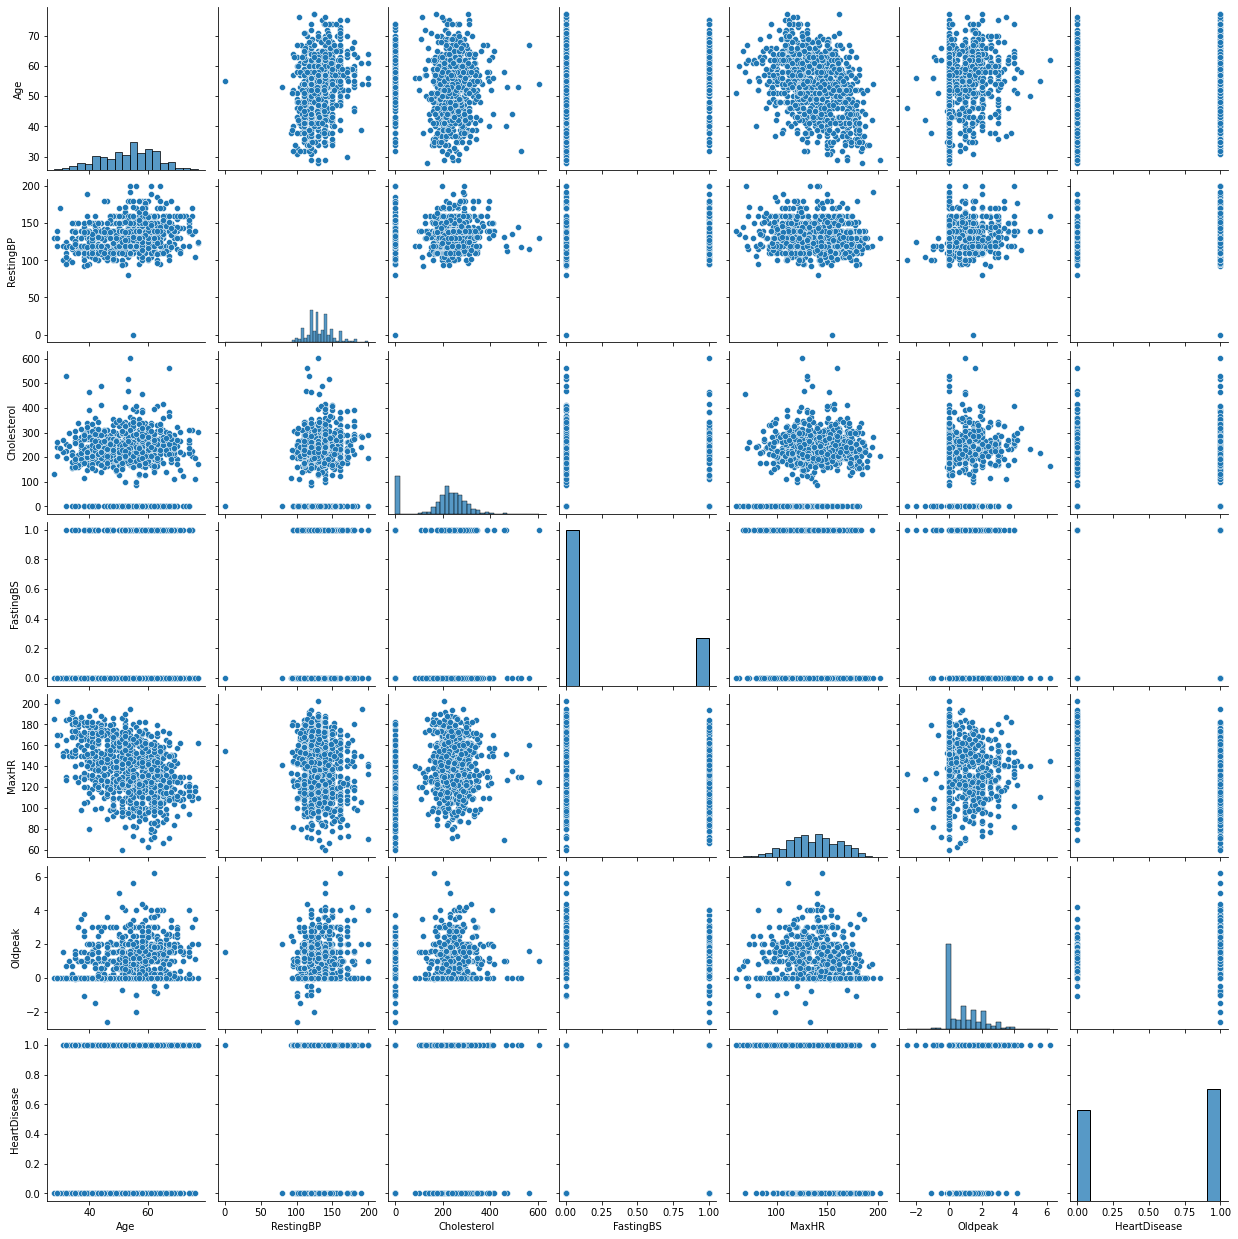

In [ ]:
sns.pairplot(data)

*PreProcessing*

a. Data Cleaning


In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [ ]:
print(data.isnull().sum()) #Checking for the missing values
data.dropna()

data.duplicated() #To find duplicate records
data.drop_duplicates(subset=list(data.columns), inplace=True) #remove duplicate records


#remove outliers
temp = data.copy()

def remove_outliers(att):
  Q1=temp[att].quantile(0.25)
  Q3=temp[att].quantile(0.75)
  IQR=Q3-Q1
  temp[att] = np.where((temp[att] < (Q1-1.5*IQR)) | (temp[att] > (Q3+1.5*IQR)), np.nan, temp[att])
  if temp[att].isnull().sum() < 150:
    temp[att].fillna(temp[att].median(), inplace=True)
  else:
    temp[att] = temp[att].dropna()
  return temp  

numerics = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col in numerics:
  remove_outliers(col)
temp.dropna()
temp

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,0,0,140.0,289.0,0,0,172.0,0,0.0,0,0
1,49.0,1,1,160.0,180.0,0,0,156.0,0,1.0,1,1
2,37.0,0,0,130.0,283.0,0,1,98.0,0,0.0,0,0
3,48.0,1,2,138.0,214.0,0,0,108.0,1,1.5,1,1
4,54.0,0,1,150.0,195.0,0,0,122.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,0,3,110.0,264.0,0,0,132.0,0,1.2,1,1
914,68.0,0,2,144.0,193.0,1,0,141.0,0,3.4,1,1
915,57.0,0,2,130.0,131.0,0,0,115.0,1,1.2,1,1
916,57.0,1,0,130.0,236.0,0,2,174.0,0,0.0,1,1


b. Redundancy

In [ ]:
data.duplicated() #check if there's duplicate row
data.drop_duplicates(subset=list(data.columns), inplace=True) #removes duplicates from the data frame records

#Using Chi-square test on a dataset to check for redundancy in the categorical attributes
categorical_col = ['Sex','ChestPainType', 'FastingBS','RestingECG', 'ExerciseAngina','ST_Slope', 'HeartDisease']

for i in range(len(categorical_col)):
  for j in range(i+1,len(categorical_col)):
    chisqt = pd.crosstab(data[categorical_col[i]], data[categorical_col[j]], margins=True)
    print(chisqt)
    value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
    print(chi2_contingency(value)[1:2],"\n")


c.reduction

In [ ]:
subset = data.sample(frac =.25, replace = False) #get .25 % of the rows
subset

d.normalize

In [ ]:
# categorical convert to numeric
cat_columns = data.select_dtypes(['object']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])
data.head()

In [ ]:
def normalize(df, column_name):
    df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
    
dataset = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']

for i in range(len(dataset)):
  column_name = dataset[i]
  normalize(data, column_name)

display(data)

e. feature selection 

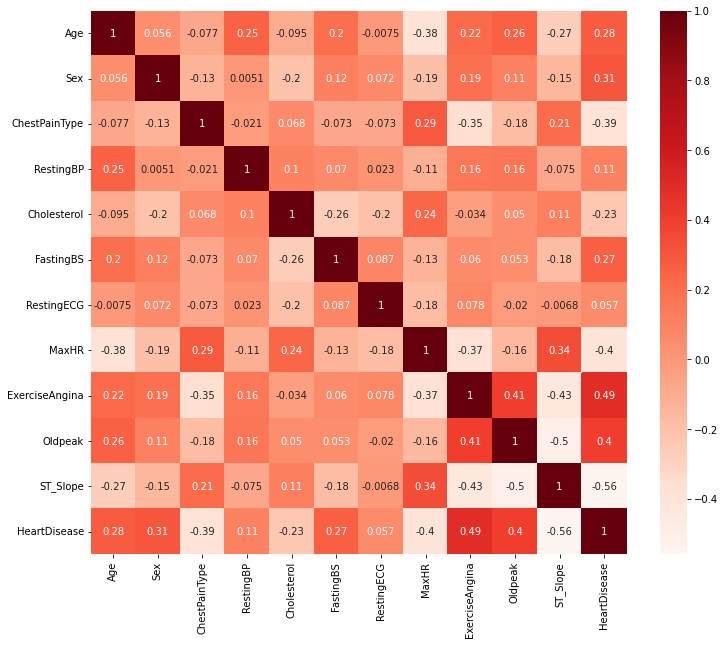

In [ ]:
data_cp = data.copy()

categoricals = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categoricals:
  data_cp[col] = data_cp[col].astype('category')
  data_cp[col] = data_cp[col].cat.codes


plt.figure(figsize=(12,10))
cor = data_cp.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()



In [ ]:
# categorical convert to numeric
cat_columns = data.select_dtypes(['object']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


K_means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
X =  data.drop(["HeartDisease"],axis = 1)

kmeans = KMeans(n_clusters=2).fit(X)
y_predicted = kmeans.predict(X)

print(confusion_matrix(data["HeartDisease"],kmeans.labels_))
print(classification_report(data["HeartDisease"],kmeans.labels_))



[[355  55]
 [192 316]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74       410
           1       0.85      0.62      0.72       508

    accuracy                           0.73       918
   macro avg       0.75      0.74      0.73       918
weighted avg       0.76      0.73      0.73       918



[[329  81]
 [ 87 421]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       410
           1       0.84      0.83      0.83       508

    accuracy                           0.82       918
   macro avg       0.81      0.82      0.82       918
weighted avg       0.82      0.82      0.82       918



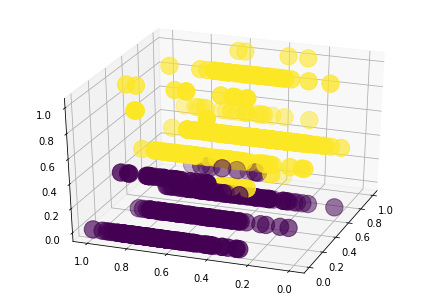

number of labels:  {0, 1}
number of cluster found: 2
number of noise(s):  0


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.cluster import KMeans

X = data[['ChestPainType', 'MaxHR','ST_Slope']].values

model = KMeans(n_clusters=2)
model.fit_predict(X)
pred = model.fit_predict(X)
labels = model.labels_

print(confusion_matrix(data["HeartDisease"],model.labels_))
print(classification_report(data["HeartDisease"],model.labels_,zero_division=1))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c=model.labels_, s=300)
ax.view_init(azim=200)
plt.show()

print("number of labels: ", set(labels))
print("number of cluster found: {}".format(len(set(labels))))
n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)
# print('cluster for each point: ', model.labels_)

DBscan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix,classification_report

X =  data.drop(["HeartDisease"],axis = 1)
model = DBSCAN(eps=0.45,min_samples=47)
model.fit_predict(X)
yhat = model.fit_predict(X)

print(confusion_matrix(data["HeartDisease"],model.labels_))
print(classification_report(data["HeartDisease"],model.labels_,zero_division=1))

[[  0   0   0]
 [277 125   8]
 [403  12  93]]
              precision    recall  f1-score   support

          -1       0.00      1.00      0.00         0
           0       0.91      0.30      0.46       410
           1       0.92      0.18      0.31       508

    accuracy                           0.24       918
   macro avg       0.61      0.50      0.25       918
weighted avg       0.92      0.24      0.37       918



Best silhouette_score: 0.4663385464259479
min_samples: 43
eps: 0.30000000000000004
[[317  79  14]
 [ 78 381  49]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       410
           1       0.83      0.75      0.79       508
           2       0.00      1.00      0.00         0

    accuracy                           0.76       918
   macro avg       0.54      0.84      0.52       918
weighted avg       0.82      0.76      0.79       918



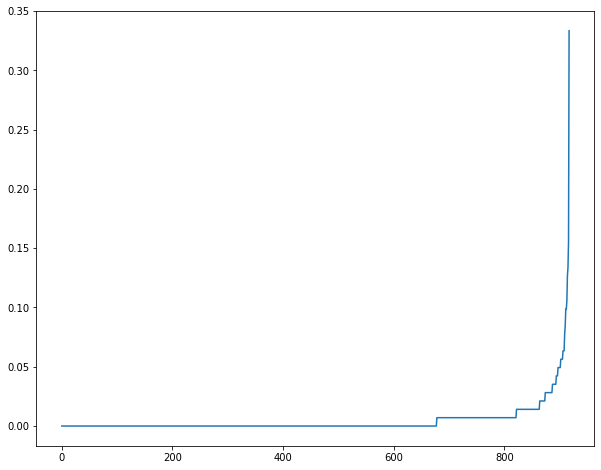

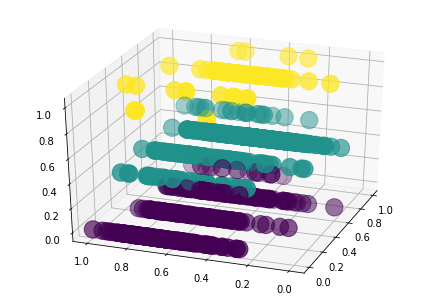

number of labels:  {0, 1, 2}
number of cluster found: 3
number of noise(s):  0


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

X = data[['ChestPainType', 'MaxHR','ST_Slope']].values


nn = NearestNeighbors(n_neighbors=20).fit(X)
distances, indices = nn.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

min_samples = range(40,60)
eps = np.arange(0.1,0.5, 0.05)
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X).labels_
        score = silhouette_score(X, labels)
        output.append((ms, ep, score))

min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")



model = DBSCAN(eps=0.46, min_samples=43)
model.fit_predict(X)
pred = model.fit_predict(X)
labels = model.labels_

print(confusion_matrix(data["HeartDisease"],model.labels_))
print(classification_report(data["HeartDisease"],model.labels_,zero_division=1))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c=model.labels_, s=300)
ax.view_init(azim=200)
plt.show()

print("number of labels: ", set(labels))
print("number of cluster found: {}".format(len(set(labels))))
n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)
# print('cluster for each point: ', model.labels_)

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


#Standardize the data set
scaler = StandardScaler()
scaler.fit(data.drop('HeartDisease', axis=1))
scaled_features = scaler.transform(data.drop('HeartDisease', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('HeartDisease', axis=1).columns)

X = data
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

clf = MLPClassifier(hidden_layer_sizes=(300,200,200), activation='logistic',
                    random_state=21, warm_start=True)
clf.fit(X_train, y_train)

ypred=clf.predict(X_test)

print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

[[ 70   2]
 [  0 112]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.98      1.00      0.99       112

    accuracy                           0.99       184
   macro avg       0.99      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



Using GridSearchCV for MLPClassifier For Best Result

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


#Split the data set into training data and test data
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

parameters={
  'learning_rate': ["constant", "invscaling", "adaptive"],
  'hidden_layer_sizes': [(500, 400, 300, 200, 100), (400, 400, 400, 400, 400),
                         (300, 300, 300, 300, 300), (200, 200, 200, 200, 200)],
  'alpha': [1, 0.1, 0.01, 0.001, 0.0001],
  'activation': ["logistic", "relu", "tanh"]
}

clf = GridSearchCV(MLPClassifier(), parameters, verbose=2, n_jobs=-1) 

# fitting the model for grid search 
clf.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(clf.best_params_) 
clf_predictions = clf.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, clf_predictions))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200, 200, 200, 200), 'learning_rate': 'invscaling'}
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        86
           1       0.83      0.88      0.86        98

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
scaler.fit(data.drop('HeartDisease', axis=1))
scaled_features = scaler.transform(data.drop('HeartDisease', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('HeartDisease', axis=1).columns)

# Prepare training data for building the model
X = scaled_data
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Training the Algorithm
svclassifier = SVC(kernel='linear')

## Train/Fit the model 
svclassifier.fit(X_train, y_train)

#Making Predictions
y_pred = svclassifier.predict(X_test)

#Evaluating the Algorithm
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 67  10]
 [  7 100]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        77
           1       0.91      0.93      0.92       107

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
scaler.fit(data.drop('HeartDisease', axis=1))
scaled_features = scaler.transform(data.drop('HeartDisease', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('HeartDisease', axis=1).columns)
scaled_data.head()

# Prepare training data for building the model
X = scaled_data
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Training the Algorithm
svclassifier = SVC(C=1000.0)

## Train/Fit the model 
svclassifier.fit(X_train, y_train)

#Making Predictions
y_pred = svclassifier.predict(X_test)

#Evaluating the Algorithm
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Model accuracy score with rbf kernel and C=1000.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[[68 22]
 [11 83]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.80        90
           1       0.79      0.88      0.83        94

    accuracy                           0.82       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

Model accuracy score with rbf kernel and C=1000.0: 0.8207


KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

scaler = StandardScaler()
scaler.fit(data.drop('HeartDisease', axis=1))
scaled_features = scaler.transform(data.drop('HeartDisease', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('HeartDisease', axis=1).columns)
scaled_data.head()

#Split the data set into training data and test data
# Prepare training data for building the model
X = scaled_data
y = data['HeartDisease']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, y, test_size = 0.2)

#Train the model and make predictions
model = KNeighborsClassifier(n_neighbors = 3) #k=3
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

#Performance measurement
print(confusion_matrix(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

[[71 13]
 [12 88]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        84
           1       0.87      0.88      0.88       100

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Accuracy: 0.82 (+/- 0.04) [knn-1]
Accuracy: 0.86 (+/- 0.03) [knn-3]
Accuracy: 0.87 (+/- 0.03) [knn-5]
Accuracy: 0.87 (+/- 0.03) [knn-7]
Accuracy: 0.87 (+/- 0.03) [knn-9]




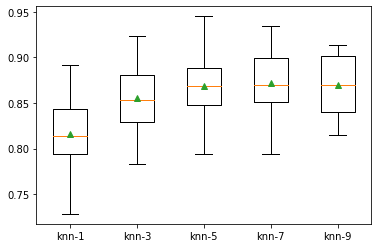

In [ ]:
from matplotlib import pyplot
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaler.fit(data.drop('HeartDisease', axis=1))
scaled_features = scaler.transform(data.drop('HeartDisease', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('HeartDisease', axis=1).columns)
scaled_data.head()

# get the dataset
def get_dataset():
	X, y =  scaled_data, data['HeartDisease']
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn-1'] = KNeighborsClassifier(n_neighbors=1)
	models['knn-3'] = KNeighborsClassifier(n_neighbors=3)
	models['knn-5'] = KNeighborsClassifier(n_neighbors=5)
	models['knn-7'] = KNeighborsClassifier(n_neighbors=7)
	models['knn-9'] = KNeighborsClassifier(n_neighbors=9)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (mean(scores), std(scores), name))
print('\n')
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

MLP + SVM

Bayes (Naive Baysian)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
 
# store the feature matrix (X) and response vector (y)
X =  data.drop(["HeartDisease"],axis = 1)
y = data['HeartDisease']
 
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
 
# training the model on training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

scaler = StandardScaler()
scaler.fit(data.drop('HeartDisease', axis=1))
scaled_features = scaler.transform(data.drop('HeartDisease', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('HeartDisease', axis=1).columns)

X = scaled_data
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
GaussianNB(priors=None)
ypred=gnb.predict(X_test)

print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, ypred, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Heart Disease')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, ypred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [ ]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

features = data.columns.values.tolist()
#features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG']

X = data[features].drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
ypred = clf.predict(X_test)

print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

Decision Tree (*After changing parameters*)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
ypred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

Enesemble (Hard Voting Classifier)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

cp_data = data.copy()

# categorical convert to numeric
cat_columns = cp_data.select_dtypes(['object']).columns
cp_data[cat_columns] = cp_data[cat_columns].apply(lambda x: pd.factorize(x)[0])
cp_data.head()

#Standardize the data set
scaler = StandardScaler()
scaler.fit(cp_data.drop('HeartDisease', axis=1))
scaled_features = scaler.transform(cp_data.drop('HeartDisease', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = cp_data.drop('HeartDisease', axis=1).columns)

X = scaled_data
y = data['HeartDisease']

kf = StratifiedKFold(n_splits=10, shuffle=True)

clf1 = SVC(kernel='rbf')
clf2 = KNeighborsClassifier(n_neighbors = 5)
clf3 = MLPClassifier(hidden_layer_sizes=(300,200,200), activation='logistic',
                    random_state=21, warm_start=True)

eclf = VotingClassifier(estimators=[('svm', clf1), ('KNN', clf2), ('MLP', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['svm', 'KNN', 'MLP', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=kf)
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.8671 (+/- 0.0346) [svm]
Accuracy: 0.8649 (+/- 0.0315) [KNN]
Accuracy: 0.8540 (+/- 0.0337) [MLP]
Accuracy: 0.8714 (+/- 0.0330) [Ensemble]


Enesemble (Soft Voting Classifier)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

cp_data = data.copy()

# categorical convert to numeric
cat_columns = cp_data.select_dtypes(['object']).columns
cp_data[cat_columns] = cp_data[cat_columns].apply(lambda x: pd.factorize(x)[0])
cp_data.head()

#Standardize the data set
scaler = StandardScaler()
scaler.fit(cp_data.drop('HeartDisease', axis=1))
scaled_features = scaler.transform(cp_data.drop('HeartDisease', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = cp_data.drop('HeartDisease', axis=1).columns)

X = scaled_data
y = cp_data['HeartDisease']

kf = StratifiedKFold(n_splits=10, shuffle=True)

clf1 = SVC(kernel='rbf', probability=True)
clf2 = KNeighborsClassifier(n_neighbors = 5)
clf3 = MLPClassifier(hidden_layer_sizes=(300,200,200), activation='logistic',
                    random_state=21, warm_start=True)

eclf = VotingClassifier(estimators=[('svm', clf1), ('KNN', clf2), ('MLP', clf3)],voting='soft')

for clf, label in zip([clf1, clf2, clf3, eclf], ['svm', 'KNN', 'MLP', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=kf)
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.8627 (+/- 0.0347) [svm]
Accuracy: 0.8715 (+/- 0.0271) [KNN]
Accuracy: 0.8497 (+/- 0.0321) [MLP]
Accuracy: 0.8682 (+/- 0.0277) [Ensemble]


Enesemble - Bagging

In [ ]:
# evaluate bagging algorithm for classification
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X =  data.drop(["HeartDisease"],axis = 1)
y = data['HeartDisease']
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f (+/- %.4f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.8442 (+/- 0.0361)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 
# importing machine learning models for prediction
import xgboost as xgb
 
# importing bagging module
from sklearn.ensemble import BaggingClassifier
 
X = scaled_data
y = cp_data['HeartDisease']
 
# Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
 
model = BaggingClassifier(n_estimators=250)
 
# training model
model.fit(X_train, y_train)
 
# predicting the output on the test dataset
pred = model.predict(X_test)
 
# printing the root mean squared error between real value and predicted value
model.score(X_test, y_test)

0.8586956521739131

Apriori

In [ ]:
#!pip install apyori
#!pip install efficient-apriori

from apyori import apriori
#from mlxtend.frequent_patterns import apriori, association_rules

data_selection = data[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']]

cleanup_nums = {"Sex":           {"F": "Female", "M": "Male"},
                "ChestPainType": {"ATA": "ChestPainType ATA", "NAP": "ChestPainType NAP", "ASY": "ChestPainType ASY", "TA": "ChestPainType TA"}, 
                "FastingBS":      {0: 'No FastingBS', 1: 'FastingBS'},
                "RestingECG":     {"Normal": "RestingECG Normal", "ST": "RestingECG ST", "LVH": "RestingECG LVH"},
                "ExerciseAngina": {"N": "No ExerciseAngina", "Y": "ExerciseAngina"},
                "ST_Slope":       {"Up": "ST_Slope Up", "Flat": "ST_Slope Flat", "Down": "ST_Slope Down"},
                "HeartDisease":   {0: 'No HeartDisease', 1: 'HeartDisease'},
               }

data_selection = data_selection.replace(cleanup_nums)

records = []
for i in range(0, 918):
    records.append([str(data_selection.values[i,j]) for j in range(0, 7)])

*transform the record list into the right format via the TransactionEncoder*

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,ChestPainType ASY,ChestPainType ATA,ChestPainType NAP,ChestPainType TA,ExerciseAngina,FastingBS,Female,HeartDisease,Male,No ExerciseAngina,No FastingBS,No HeartDisease,RestingECG LVH,RestingECG Normal,RestingECG ST,ST_Slope Down,ST_Slope Flat,ST_Slope Up
0,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,False,False,True
1,False,False,True,False,False,False,True,True,False,True,True,False,False,True,False,False,True,False
2,False,True,False,False,False,False,False,False,True,True,True,True,False,False,True,False,False,True
3,True,False,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,False
4,False,False,True,False,False,False,False,False,True,True,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,True,False,False,False,True,True,True,True,False,False,True,False,False,True,False
914,True,False,False,False,False,True,False,True,True,True,False,False,False,True,False,False,True,False
915,True,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,True,False
916,False,True,False,False,False,False,True,True,False,True,True,False,True,False,False,False,True,False


*Frequent Itemsets*

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.540305,(ChestPainType ASY)
1,0.404139,(ExerciseAngina)
2,0.553377,(HeartDisease)
3,0.789760,(Male)
4,0.595861,(No ExerciseAngina)
5,0.766885,(No FastingBS)
6,0.446623,(No HeartDisease)
7,0.601307,(RestingECG Normal)
8,0.501089,(ST_Slope Flat)
9,0.430283,(ST_Slope Up)


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift")

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChestPainType ASY),(HeartDisease),0.540305,0.553377,0.427015,0.790323,1.428181,0.128023,2.130049
1,(HeartDisease),(ChestPainType ASY),0.553377,0.540305,0.427015,0.771654,1.428181,0.128023,2.013147
2,(Male),(ChestPainType ASY),0.789760,0.540305,0.464052,0.587586,1.087508,0.037341,1.114645
3,(ChestPainType ASY),(Male),0.540305,0.789760,0.464052,0.858871,1.087508,0.037341,1.489698
4,(Male),(HeartDisease),0.789760,0.553377,0.498911,0.631724,1.141580,0.061876,1.212741
5,(HeartDisease),(Male),0.553377,0.789760,0.498911,0.901575,1.141580,0.061876,2.136035
6,(ST_Slope Flat),(HeartDisease),0.501089,0.553377,0.415033,0.828261,1.496739,0.137741,2.600590
7,(HeartDisease),(ST_Slope Flat),0.553377,0.501089,0.415033,0.750000,1.496739,0.137741,1.995643
8,(No ExerciseAngina),(Male),0.595861,0.789760,0.432462,0.725777,0.918984,-0.038125,0.766674
9,(Male),(No ExerciseAngina),0.789760,0.595861,0.432462,0.547586,0.918984,-0.038125,0.893296


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChestPainType ASY),(HeartDisease),0.540305,0.553377,0.427015,0.790323,1.428181,0.128023,2.130049
1,(HeartDisease),(ChestPainType ASY),0.553377,0.540305,0.427015,0.771654,1.428181,0.128023,2.013147
2,(Male),(ChestPainType ASY),0.789760,0.540305,0.464052,0.587586,1.087508,0.037341,1.114645
3,(ChestPainType ASY),(Male),0.540305,0.789760,0.464052,0.858871,1.087508,0.037341,1.489698
4,(Male),(HeartDisease),0.789760,0.553377,0.498911,0.631724,1.141580,0.061876,1.212741
5,(HeartDisease),(Male),0.553377,0.789760,0.498911,0.901575,1.141580,0.061876,2.136035
6,(ST_Slope Flat),(HeartDisease),0.501089,0.553377,0.415033,0.828261,1.496739,0.137741,2.600590
7,(HeartDisease),(ST_Slope Flat),0.553377,0.501089,0.415033,0.750000,1.496739,0.137741,1.995643
8,(ST_Slope Flat),(Male),0.501089,0.789760,0.419390,0.836957,1.059760,0.023649,1.289470
9,(Male),(ST_Slope Flat),0.789760,0.501089,0.419390,0.531034,1.059760,0.023649,1.063854
